In [73]:
import pandas as pd
import numpy as np
import matplotlib
from tqdm import tqdm, trange
import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('electonic/events.csv')

In [75]:
electronics = df[df['category_code'].str.contains('electronics', na=False)]
elect = electronics.dropna(subset=['brand', 'user_session']) 

In [76]:
elect.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124602 entries, 14 to 885126
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     124602 non-null  object 
 1   event_type     124602 non-null  object 
 2   product_id     124602 non-null  int64  
 3   category_id    124602 non-null  int64  
 4   category_code  124602 non-null  object 
 5   brand          124602 non-null  object 
 6   price          124602 non-null  float64
 7   user_id        124602 non-null  int64  
 8   user_session   124602 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 9.5+ MB


In [77]:
elect.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
14,2020-09-24 12:00:01 UTC,view,1455459,2144415927049912542,electronics.video.tv,sony,635.63,1515915625519385419,sF2S2yMO09
19,2020-09-24 12:00:37 UTC,view,10914,2144415925053423789,electronics.camera.video,sony,40.95,1515915625519389726,kYKAorW97d
33,2020-09-24 12:02:19 UTC,view,3828758,2144415975410238005,electronics.audio.acoustic,eva,21.59,1515915625519390366,F71OG8wWVP
40,2020-09-24 12:03:01 UTC,view,3661285,2144415927049912542,electronics.video.tv,lg,810.68,1515915625470774320,HMot99bSay
46,2020-09-24 12:04:15 UTC,view,3149184,2144415921421156430,electronics.telephone,flexis,6.97,1515915625519391247,t5aw8VKVBj


In [78]:
elect.reset_index(inplace = True)

In [79]:
elect['month'] = np.nan
for i in trange(len(elect)):
    elect['month'][i] = elect['event_time'][i][:7]

100%|██████████| 124602/124602 [00:02<00:00, 44303.19it/s]


In [80]:
elect['view'] = np.nan
elect['cart'] = np.nan
elect['purchase'] = np.nan

In [81]:
for i in trange(len(elect)):
    if elect['event_type'][i] == 'view':
        elect['view'][i] = 1
    elif elect['event_type'][i] == 'cart':
        elect['cart'][i] = 1
    else:
        elect['purchase'][i] = 1

100%|██████████| 124602/124602 [00:34<00:00, 3574.00it/s]


In [82]:
elect['purchase_price'] = np.nan
for i in trange(len(elect)):
    if elect['event_type'][i] == 'purchase':
        elect['purchase_price'][i] = elect['price'][i]

100%|██████████| 124602/124602 [00:01<00:00, 64328.81it/s]


In [83]:
def func(x):

    d = {}

    d['view'] = x['view'].sum()

    d['cart'] = x['cart'].sum()

    d['purchase'] = x['purchase'].sum()

    d['cart/view'] = round(x['cart'].sum() / x['view'].sum(), 4)  * 100

    d['purchase/cart'] = round(x['purchase'].sum() / x['cart'].sum(), 4) * 100
    
    d['tot_price'] = x['purchase_price'].sum()

    d['price_per_purchase'] = round(x['purchase_price'].sum() / x['purchase'].sum(),2)

    return pd.Series(d, index=['view', 'cart', 'purchase', 'cart/view', 'purchase/cart', 'tot_price','price_per_purchase'])





In [84]:
elec_month= elect.groupby('month').apply(func)

In [85]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07


In [86]:
import matplotlib.pyplot as plt

In [87]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07


In [88]:
elec_month['view_percent'] = elec_month['view'] / elec_month['view'].sum() * 100
elec_month['cart_percent'] = elec_month['cart'] / elec_month['cart'].sum() * 100
elec_month['purchase_percent'] = elec_month['purchase'] / elec_month['purchase'].sum() * 100

In [89]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase,view_percent,cart_percent,purchase_percent
month,,,,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77,3.235149,2.767088,3.038240
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59,19.424766,17.995235,18.858041
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20,22.773505,20.835624,21.398638
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54,18.845544,21.275426,20.639078
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37,19.003356,18.984790,19.146150
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07,16.717681,18.141836,16.919853


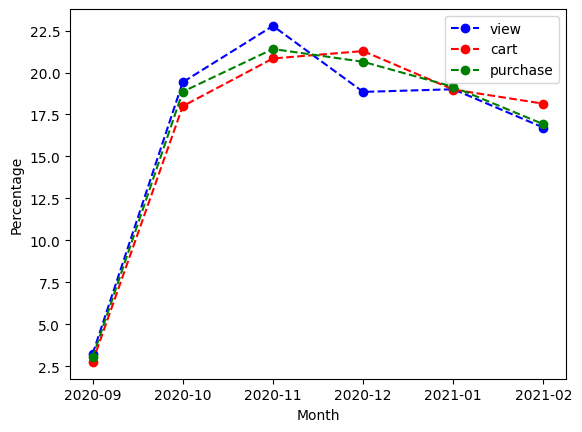

In [90]:
plt.plot(elec_month['view_percent'],'bo--', label = 'view')
plt.plot(elec_month['cart_percent'],'ro--', label = 'cart')
plt.plot(elec_month['purchase_percent'],'go--', label = 'purchase')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.legend()

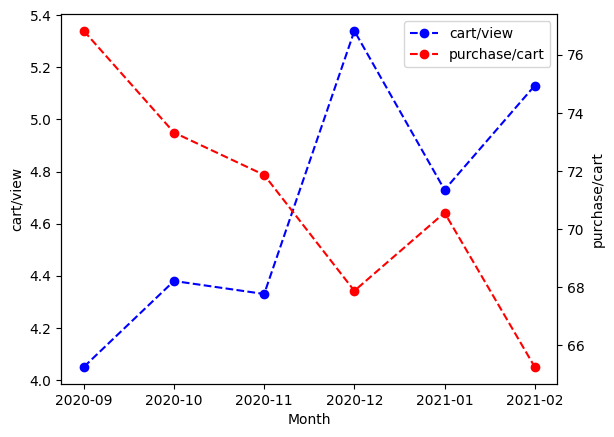

In [91]:
fig, ax1 = plt.subplots()
plt1 = ax1.plot(elec_month['cart/view'],'bo--', label = 'cart/view')
ax2 = ax1.twinx()
plt2 = ax2.plot(elec_month['purchase/cart'],'ro--', label = 'purchase/cart')
ax1.set_xlabel('Month')
ax1.set_ylabel('cart/view')
ax2.set_ylabel('purchase/cart')
plts = plt1 + plt2
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')

In [92]:
elec_month['ratio'] = elec_month['cart/view'] * elec_month['purchase/cart'] / 100

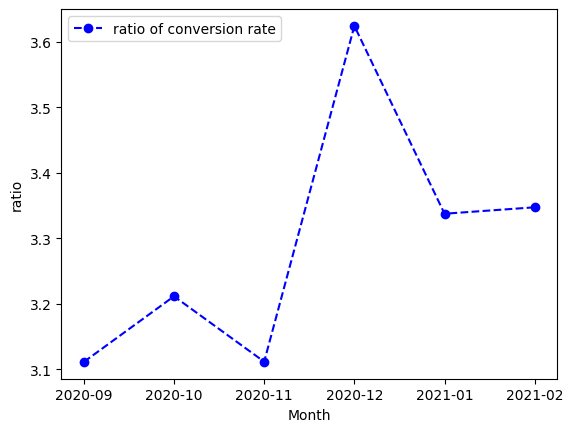

In [93]:
plt.plot(elec_month['ratio'],'bo--', label = 'ratio of conversion rate')
plt.xlabel('Month')
plt.ylabel('ratio')
plt.legend()

In [94]:
elec_month

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase,view_percent,cart_percent,purchase_percent,ratio
month,,,,,,,,,,,
2020-09,3731.0,151.0,116.0,4.05,76.82,13545.43,116.77,3.235149,2.767088,3.038240,3.111210
2020-10,22402.0,982.0,720.0,4.38,73.32,69543.08,96.59,19.424766,17.995235,18.858041,3.211416
2020-11,26264.0,1137.0,817.0,4.33,71.86,78596.11,96.20,22.773505,20.835624,21.398638,3.111538
2020-12,21734.0,1161.0,788.0,5.34,67.87,84741.79,107.54,18.845544,21.275426,20.639078,3.624258
2021-01,21916.0,1036.0,731.0,4.73,70.56,60945.67,83.37,19.003356,18.984790,19.146150,3.337488
2021-02,19280.0,990.0,646.0,5.13,65.25,64645.20,100.07,16.717681,18.141836,16.919853,3.347325


In [95]:
elec_cat_month = elect.groupby(['month','category_code']).apply(func)

In [96]:
ex_month = '2020-09'
num = []
cnt = 0
for i in elec_cat_month.index:
    if i[0] != ex_month:
        ex_month = i[0]
        num.append(cnt)
        cnt += 1
    else:
        cnt += 1
num.append(cnt)



In [97]:
num

[15, 30, 45, 60, 75, 90]

In [98]:
elec_cat_month.iloc[:num[0],:]

view  cart  purchase  \
month   category_code                                                 
2020-09 electronics.audio.acoustic            771.0  27.0      21.0   
        electronics.audio.dictaphone           11.0   1.0       1.0   
        electronics.audio.headphone           224.0   4.0       2.0   
        electronics.audio.microphone           88.0   4.0       3.0   
        electronics.audio.music_tools.piano     9.0   0.0       0.0   
        electronics.calculator                  7.0   1.0       1.0   
        electronics.camera.photo                4.0   0.0       0.0   
        electronics.camera.video               58.0   3.0       1.0   
        electronics.clocks                    111.0   4.0       0.0   
        electronics.fax                        12.0   0.0       0.0   
        electronics.tablet                    404.0  27.0      22.0   
        electronics.telephone                1435.0  63.0      55.0   
        electronics.video.projector            49.0   6.0       9.0   
        electronics.video.tv                  531.0  11.0       1.0   
        electronics.video.tv_remote            17.0   0.0       0.0   

                                             cart/view  purchase/cart  \
month   category_code                                                   
2020-09 electronics.audio.acoustic                3.50          77.78   
        electronics.audio.dictaphone              9.09         100.00   
        electronics.audio.headphone               1.79          50.00   
        electronics.audio.microphone              4.55          75.00   
        electronics.audio.music_tools.piano       0.00            NaN   
        electronics.calculator                   14.29         100.00   
        electronics.camera.photo                  0.00            NaN   
        electronics.camera.video                  5.17          33.33   
        electronics.clocks                        3.60           0.00   
        electronics.fax                           0.00            NaN   
        electronics.tablet                        6.68          81.48   
        electronics.telephone                     4.39          87.30   
        electronics.video.projector              12.24         150.00   
        electronics.video.tv                      2.07           9.09   
        electronics.video.tv_remote               0.00            NaN   

                                             tot_price  price_per_purchase  
month   category_code                                                       
2020-09 electronics.audio.acoustic             2480.88              118.14  
        electronics.audio.dictaphone             31.21               31.21  
        electronics.audio.headphone              56.03               28.02  
        electronics.audio.microphone            124.82               41.61  
        electronics.audio.music_tools.piano       0.00                 NaN  
        electronics.calculator                   17.25               17.25  
        electronics.camera.photo                  0.00                 NaN  
        electronics.camera.video                607.92              607.92  
        electronics.clocks                        0.00                 NaN  
        electronics.fax                           0.00                 NaN  
        electronics.tablet                     1609.39               73.15  
        electronics.telephone                  2633.30               47.88  
        electronics.video.projector            5566.61              618.51  
        electronics.video.tv                    418.02              418.02  
        electronics.video.tv_remote               0.00                 NaN

In [99]:
imp_cat = ['electronics.audio.acoustic','electronics.tablet','electronics.telephone','electronics.audio.headphone','electronics.video.tv']

In [100]:
elect_l = elect[elect['month'] != '2020-09']

In [101]:
elec_month_cat = elect_l[elect_l['category_code'].isin(imp_cat)].groupby(['category_code','month']).apply(func)

In [102]:
elec_month_cat

view   cart  purchase  cart/view  \
category_code               month                                         
electronics.audio.acoustic  2020-10  4625.0  209.0     167.0       4.52   
                            2020-11  5195.0  238.0     196.0       4.58   
                            2020-12  3885.0  192.0     151.0       4.94   
                            2021-01  4768.0  237.0     173.0       4.97   
                            2021-02  3839.0  171.0     109.0       4.45   
electronics.audio.headphone 2020-10  1264.0   27.0      16.0       2.14   
                            2020-11  1421.0   60.0      59.0       4.22   
                            2020-12  1226.0   70.0      52.0       5.71   
                            2021-01  1253.0   61.0      51.0       4.87   
                            2021-02  1135.0   48.0      29.0       4.23   
electronics.tablet          2020-10  2575.0  158.0     116.0       6.14   
                            2020-11  3219.0  175.0     135.0       5.44   
                            2020-12  2497.0  157.0     114.0       6.29   
                            2021-01  2506.0  127.0      76.0       5.07   
                            2021-02  1918.0  112.0      70.0       5.84   
electronics.telephone       2020-10  8791.0  446.0     312.0       5.07   
                            2020-11  9508.0  474.0     317.0       4.99   
                            2020-12  7907.0  489.0     325.0       6.18   
                            2021-01  8126.0  419.0     310.0       5.16   
                            2021-02  7340.0  424.0     275.0       5.78   
electronics.video.tv        2020-10  3227.0   64.0      42.0       1.98   
                            2020-11  4803.0   99.0      55.0       2.06   
                            2020-12  4219.0  154.0      67.0       3.65   
                            2021-01  3593.0  130.0      76.0       3.62   
                            2021-02  3505.0  177.0     119.0       5.05   

                                     purchase/cart  tot_price  \
category_code               month                               
electronics.audio.acoustic  2020-10          79.90   12928.36   
                            2020-11          82.35   20156.17   
                            2020-12          78.65   16464.27   
                            2021-01          73.00   17774.53   
                            2021-02          63.74   12818.66   
electronics.audio.headphone 2020-10          59.26     543.15   
                            2020-11          98.33    5360.64   
                            2020-12          74.29    4995.70   
                            2021-01          83.61    5969.89   
                            2021-02          60.42    2936.51   
electronics.tablet          2020-10          73.42   10497.51   
                            2020-11          77.14   14125.75   
                            2020-12          72.61   12963.28   
                            2021-01          59.84    5949.47   
                            2021-02          62.50    4455.02   
electronics.telephone       2020-10          69.96   15723.48   
                            2020-11          66.88   14859.55   
                            2020-12          66.46   18315.42   
                            2021-01          73.99   17268.71   
                            2021-02          64.86   14372.05   
electronics.video.tv        2020-10          65.62   11333.80   
                            2020-11          55.56    7788.61   
                            2020-12          43.51    8540.80   
                            2021-01          58.46   10023.38   
                            2021-02          67.23   17269.46   

                                     price_per_purchase  
category_code               month                        
electronics.audio.acoustic  2020-10               77.42  
                            2020-11              102.84  
                         

In [103]:
elec_month_cat.reset_index(inplace = True)

In [104]:
elec_month_cat.set_index('month', inplace = True)

In [105]:
elec_month_cat

,category_code,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,,
2020-10,electronics.audio.acoustic,4625.0,209.0,167.0,4.52,79.90,12928.36,77.42
2020-11,electronics.audio.acoustic,5195.0,238.0,196.0,4.58,82.35,20156.17,102.84
2020-12,electronics.audio.acoustic,3885.0,192.0,151.0,4.94,78.65,16464.27,109.03
2021-01,electronics.audio.acoustic,4768.0,237.0,173.0,4.97,73.00,17774.53,102.74
2021-02,electronics.audio.acoustic,3839.0,171.0,109.0,4.45,63.74,12818.66,117.60
2020-10,electronics.audio.headphone,1264.0,27.0,16.0,2.14,59.26,543.15,33.95
2020-11,electronics.audio.headphone,1421.0,60.0,59.0,4.22,98.33,5360.64,90.86
2020-12,electronics.audio.headphone,1226.0,70.0,52.0,5.71,74.29,4995.70,96.07
2021-01,electronics.audio.headphone,1253.0,61.0,51.0,4.87,83.61,5969.89,117.06


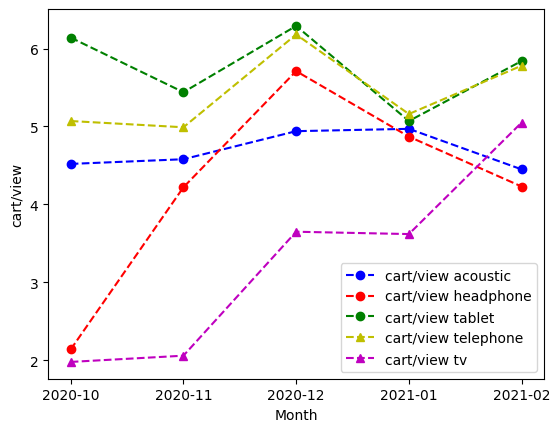

In [106]:
fig, ax1 = plt.subplots()
plt10 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['cart/view'],'bo--', label = 'cart/view acoustic')
plt11 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['cart/view'],'ro--', label = 'cart/view headphone')
plt12 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['cart/view'],'go--', label = 'cart/view tablet')
plt13 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['cart/view'],'y^--', label = 'cart/view telephone')
plt14 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['cart/view'],'m^--', label = 'cart/view tv')
# ax2 = ax1.twinx()
# plt20 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['purchase/cart'],'bo--', label = 'purchase/cart acoustic')
# plt21 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['purchase/cart'],'bo--', label = 'purchase/cart headphone')
# plt22 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['purchase/cart'],'bo--', label = 'purchase/cart tablet')
# plt23 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['purchase/cart'],'bo--', label = 'purchase/cart telephone')
# plt24 = ax2.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['purchase/cart'],'bo--', label = 'purchase/cart tv')
ax1.set_xlabel('Month')
ax1.set_ylabel('cart/view')
# ax2.set_ylabel('purchase/cart')
plts = plt10 + plt11 + plt12 + plt13 + plt14 
#+ plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'lower right')

In [107]:
elec_month_cat.groupby('category_code')['view','cart','purchase'].agg('sum')

,view,cart,purchase
category_code,,,
electronics.audio.acoustic,22312.0,1047.0,796.0
electronics.audio.headphone,6299.0,266.0,207.0
electronics.tablet,12715.0,729.0,511.0
electronics.telephone,41672.0,2252.0,1539.0
electronics.video.tv,19347.0,624.0,359.0


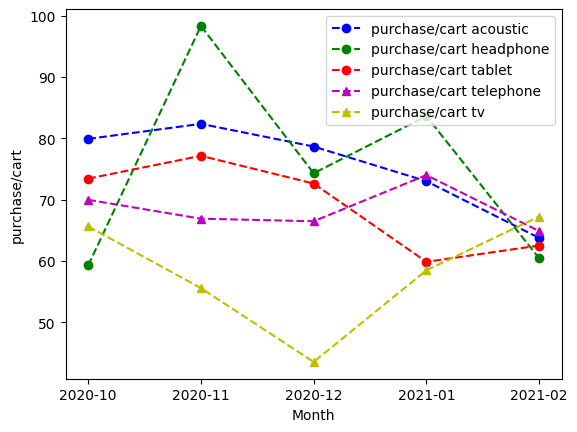

In [108]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.acoustic']['purchase/cart'],'bo--', label = 'purchase/cart acoustic')
plt21 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.audio.headphone']['purchase/cart'],'go--', label = 'purchase/cart headphone')
plt22 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.tablet']['purchase/cart'],'ro--', label = 'purchase/cart tablet')
plt23 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.telephone']['purchase/cart'],'m^--', label = 'purchase/cart telephone')
plt24 = ax1.plot(elec_month_cat[elec_month_cat['category_code'] == 'electronics.video.tv']['purchase/cart'],'y^--', label = 'purchase/cart tv')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('purchase/cart')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')

In [109]:
elect_imp_cat = elect_l[elect_l['category_code'] == 'electronics.telephone']

In [110]:
elect_imp_cat.head()

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,month,view,cart,purchase,purchase_price
3999,28091,2020-10-01 00:17:29 UTC,view,29840,2144415925229584562,electronics.telephone,panasonic,61.90,1515915625521279837,v8c0IKAKqQ,2020-10,1.0,NaN,NaN,NaN
4008,28160,2020-10-01 01:17:53 UTC,view,3791150,2144415925196030129,electronics.telephone,xiaomi,110.10,1515915625521284900,ndx9oWIuVW,2020-10,1.0,NaN,NaN,NaN
4011,28169,2020-10-01 01:25:02 UTC,view,1821803,2144415922528452715,electronics.telephone,sirius,30.48,1515915625521285452,asxuy2CcDK,2020-10,1.0,NaN,NaN,NaN
4012,28172,2020-10-01 01:31:00 UTC,view,3605900,2144415925196030129,electronics.telephone,inoi,36.17,1515915625484218085,sWL5mzLrk5,2020-10,1.0,NaN,NaN,NaN
4014,28185,2020-10-01 01:53:00 UTC,view,4102398,2144415925196030129,electronics.telephone,huawei,413.16,1515915625521288149,ICxq2Rtbwt,2020-10,1.0,NaN,NaN,NaN


In [111]:
elec_tele_gp = elect_imp_cat.groupby('month').apply(func)

In [112]:
elec_tele_gp

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-10,8791.0,446.0,312.0,5.07,69.96,15723.48,50.40
2020-11,9508.0,474.0,317.0,4.99,66.88,14859.55,46.88
2020-12,7907.0,489.0,325.0,6.18,66.46,18315.42,56.36
2021-01,8126.0,419.0,310.0,5.16,73.99,17268.71,55.71
2021-02,7340.0,424.0,275.0,5.78,64.86,14372.05,52.26


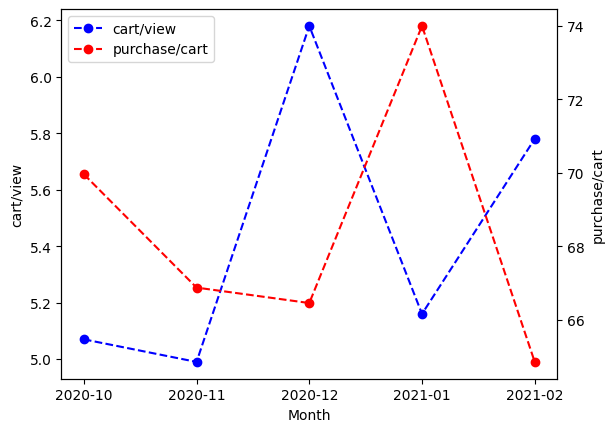

In [113]:
fig, ax1 = plt.subplots()
plt1 = ax1.plot(elec_tele_gp['cart/view'],'bo--', label = 'cart/view')
ax2 = ax1.twinx()
plt2 = ax2.plot(elec_tele_gp['purchase/cart'],'ro--', label = 'purchase/cart')
ax1.set_xlabel('Month')
ax1.set_ylabel('cart/view')
ax2.set_ylabel('purchase/cart')
plts = plt1 + plt2
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper left')

In [114]:
elec_tele_gp['ratio'] = elec_tele_gp['cart/view'] * elec_tele_gp['purchase/cart'] / 100

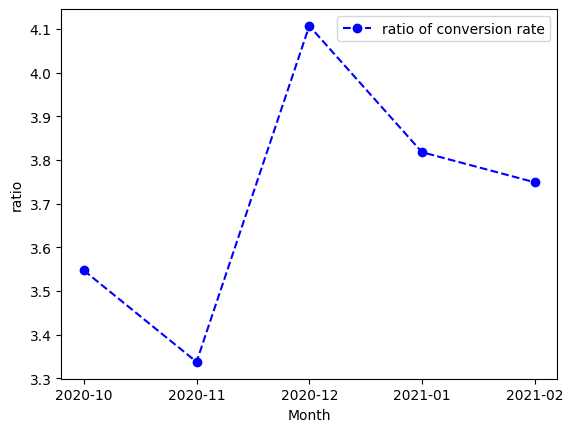

In [115]:
plt.plot(elec_tele_gp['ratio'],'bo--', label = 'ratio of conversion rate')
plt.xlabel('Month')
plt.ylabel('ratio')
plt.legend()

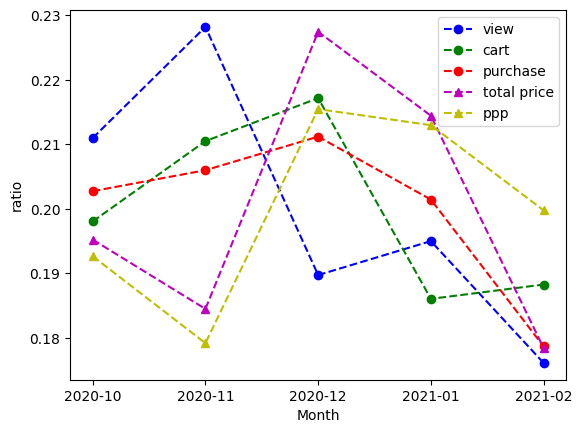

In [116]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elec_tele_gp['view'] / elec_tele_gp['view'].sum(),'bo--', label = 'view')
plt21 = ax1.plot(elec_tele_gp['cart'] / elec_tele_gp['cart'].sum(),'go--', label = 'cart')
plt22 = ax1.plot(elec_tele_gp['purchase'] / elec_tele_gp['purchase'].sum(),'ro--', label = 'purchase')
plt23 = ax1.plot(elec_tele_gp['tot_price'] / elec_tele_gp['tot_price'].sum(),'m^--', label = 'total price')
plt24 = ax1.plot(elec_tele_gp['price_per_purchase'] / elec_tele_gp['price_per_purchase'].sum(),'y^--', label = 'ppp')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('ratio')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')

In [117]:
elec_tele_gp['day'] = [31, 30, 31, 31, 28]

In [118]:
elec_tele_gp

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase,ratio,day
month,,,,,,,,,
2020-10,8791.0,446.0,312.0,5.07,69.96,15723.48,50.40,3.546972,31
2020-11,9508.0,474.0,317.0,4.99,66.88,14859.55,46.88,3.337312,30
2020-12,7907.0,489.0,325.0,6.18,66.46,18315.42,56.36,4.107228,31
2021-01,8126.0,419.0,310.0,5.16,73.99,17268.71,55.71,3.817884,31
2021-02,7340.0,424.0,275.0,5.78,64.86,14372.05,52.26,3.748908,28


In [119]:
elec_tele_gp['vpd'] = elec_tele_gp['view'] / elec_tele_gp['day']
elec_tele_gp['cpd'] = elec_tele_gp['cart'] / elec_tele_gp['day']
elec_tele_gp['ppd'] = elec_tele_gp['purchase'] / elec_tele_gp['day']
elec_tele_gp['tppd'] = elec_tele_gp['tot_price'] / elec_tele_gp['day']


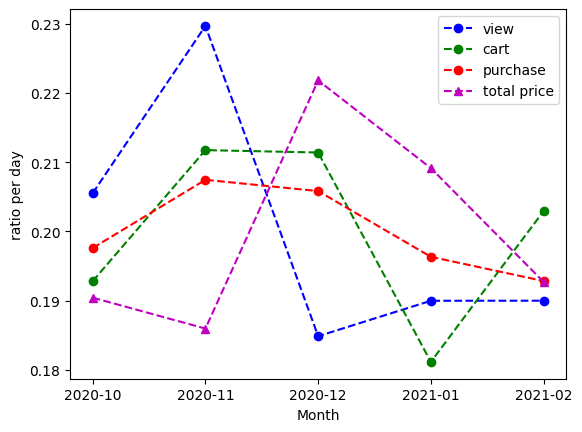

In [120]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elec_tele_gp['vpd'] / elec_tele_gp['vpd'].sum(),'bo--', label = 'view')
plt21 = ax1.plot(elec_tele_gp['cpd'] / elec_tele_gp['cpd'].sum(),'go--', label = 'cart')
plt22 = ax1.plot(elec_tele_gp['ppd'] / elec_tele_gp['ppd'].sum(),'ro--', label = 'purchase')
plt23 = ax1.plot(elec_tele_gp['tppd'] / elec_tele_gp['tppd'].sum(),'m^--', label = 'total price')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('ratio per day')
plts =  plt20 + plt21 + plt22 + plt23 
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'upper right')

In [121]:
elect_imp_cat.groupby('brand')['index','view','cart','purchase'].agg('count').sort_values(by = 'index', ascending=False).head()

,index,view,cart,purchase
brand,,,,
samsung,9666,9029,371,266
sirius,9238,7780,795,663
ark,2608,2400,142,66
xiaomi,2566,2428,107,31
alcatel,2148,2021,88,39


In [122]:
elect_imp_cat[elect_imp_cat['month'] == '2020-12'].groupby('brand')['index','view','cart','purchase'].agg('count').sort_values(by = 'index', ascending=False).head()

,index,view,cart,purchase
brand,,,,
sirius,1847,1511,181,155
samsung,1790,1662,75,53
xiaomi,587,553,31,3
ark,554,503,35,16
alcatel,463,439,15,9


In [123]:
brand = list(elect_imp_cat.groupby('brand')['index'].agg('count').sort_values(ascending=False).index[:5])

In [124]:
elect_brand = elect_imp_cat[elect_imp_cat['brand'].isin(brand)].groupby(['month','brand'])['index','view','cart','purchase'].agg('count')

In [125]:
elect_brand

index  view  cart  purchase
month   brand                               
2020-10 alcatel    424   396    22         6
        ark        493   455    27        11
        samsung   1761  1665    60        36
        sirius    2113  1824   153       136
        xiaomi     468   448    17         3
2020-11 alcatel    470   447    17         6
        ark        640   586    34        20
        samsung   2049  1937    63        49
        sirius    2120  1822   168       130
        xiaomi     632   590    27        15
2020-12 alcatel    463   439    15         9
        ark        554   503    35        16
        samsung   1790  1662    75        53
        sirius    1847  1511   181       155
        xiaomi     587   553    31         3
2021-01 alcatel    407   391    12         4
        ark        489   450    29        10
        samsung   2141  1992    88        61
        sirius    1666  1387   143       136
        xiaomi     482   463    13         6
2021-02 alcatel    384   348    22        14
        ark        432   406    17         9
        samsung   1925  1773    85        67
        sirius    1492  1236   150       106
        xiaomi     397   374    19         4

In [126]:
elect_brand = pd.DataFrame(elect_brand)

In [127]:
elect_brand.reset_index(inplace=True)
elect_brand.set_index('month', inplace = True)

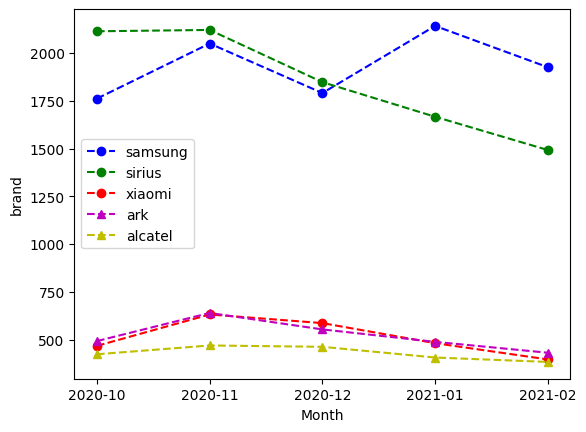

In [128]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elect_brand[elect_brand['brand'] == 'samsung']['index'],'bo--', label = 'samsung')
plt21 = ax1.plot(elect_brand[elect_brand['brand'] == 'sirius']['index'],'go--', label = 'sirius')
plt22 = ax1.plot(elect_brand[elect_brand['brand'] == 'xiaomi']['index'],'ro--', label = 'xiaomi')
plt23 = ax1.plot(elect_brand[elect_brand['brand'] == 'ark']['index'],'m^--', label = 'ark')
plt24 = ax1.plot(elect_brand[elect_brand['brand'] == 'alcatel']['index'],'y^--', label = 'alcatel')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('brand')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'center left')

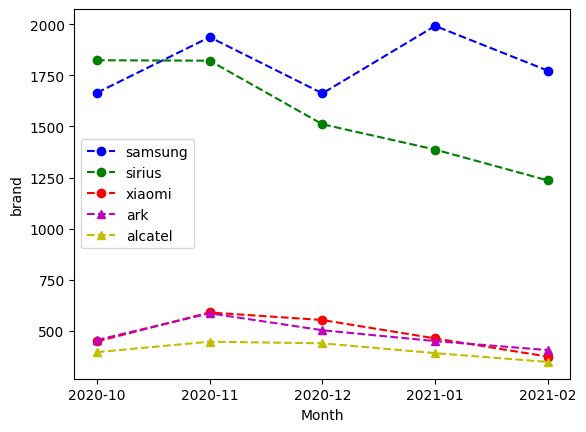

In [129]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elect_brand[elect_brand['brand'] == 'samsung']['view'],'bo--', label = 'samsung')
plt21 = ax1.plot(elect_brand[elect_brand['brand'] == 'sirius']['view'],'go--', label = 'sirius')
plt22 = ax1.plot(elect_brand[elect_brand['brand'] == 'xiaomi']['view'],'ro--', label = 'xiaomi')
plt23 = ax1.plot(elect_brand[elect_brand['brand'] == 'ark']['view'],'m^--', label = 'ark')
plt24 = ax1.plot(elect_brand[elect_brand['brand'] == 'alcatel']['view'],'y^--', label = 'alcatel')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('brand')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'center left')

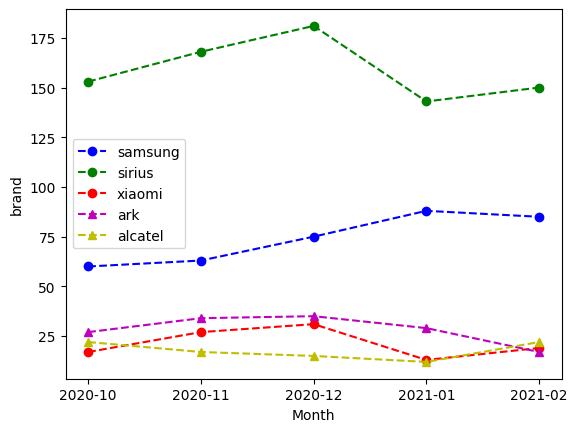

In [130]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elect_brand[elect_brand['brand'] == 'samsung']['cart'],'bo--', label = 'samsung')
plt21 = ax1.plot(elect_brand[elect_brand['brand'] == 'sirius']['cart'],'go--', label = 'sirius')
plt22 = ax1.plot(elect_brand[elect_brand['brand'] == 'xiaomi']['cart'],'ro--', label = 'xiaomi')
plt23 = ax1.plot(elect_brand[elect_brand['brand'] == 'ark']['cart'],'m^--', label = 'ark')
plt24 = ax1.plot(elect_brand[elect_brand['brand'] == 'alcatel']['cart'],'y^--', label = 'alcatel')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('brand')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'center left')

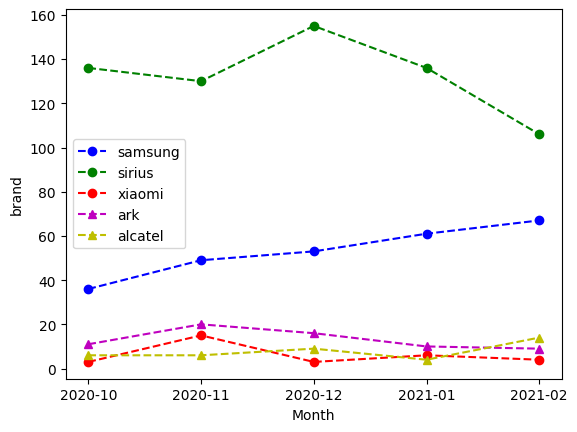

In [131]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elect_brand[elect_brand['brand'] == 'samsung']['purchase'],'bo--', label = 'samsung')
plt21 = ax1.plot(elect_brand[elect_brand['brand'] == 'sirius']['purchase'],'go--', label = 'sirius')
plt22 = ax1.plot(elect_brand[elect_brand['brand'] == 'xiaomi']['purchase'],'ro--', label = 'xiaomi')
plt23 = ax1.plot(elect_brand[elect_brand['brand'] == 'ark']['purchase'],'m^--', label = 'ark')
plt24 = ax1.plot(elect_brand[elect_brand['brand'] == 'alcatel']['purchase'],'y^--', label = 'alcatel')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('brand')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'center left')

### Samsung Analysis

In [132]:
elect_imp_cat = elect_l[elect_l['category_code'] == 'electronics.telephone']

In [133]:
elect_imp_cat

,index,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,month,view,cart,purchase,purchase_price
3999,28091,2020-10-01 00:17:29 UTC,view,29840,2144415925229584562,electronics.telephone,panasonic,61.90,1515915625521279837,v8c0IKAKqQ,2020-10,1.0,NaN,NaN,NaN
4008,28160,2020-10-01 01:17:53 UTC,view,3791150,2144415925196030129,electronics.telephone,xiaomi,110.10,1515915625521284900,ndx9oWIuVW,2020-10,1.0,NaN,NaN,NaN
4011,28169,2020-10-01 01:25:02 UTC,view,1821803,2144415922528452715,electronics.telephone,sirius,30.48,1515915625521285452,asxuy2CcDK,2020-10,1.0,NaN,NaN,NaN
4012,28172,2020-10-01 01:31:00 UTC,view,3605900,2144415925196030129,electronics.telephone,inoi,36.17,1515915625484218085,sWL5mzLrk5,2020-10,1.0,NaN,NaN,NaN
4014,28185,2020-10-01 01:53:00 UTC,view,4102398,2144415925196030129,electronics.telephone,huawei,413.16,1515915625521288149,ICxq2Rtbwt,2020-10,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124581,884988,2021-02-28 22:50:18 UTC,purchase,3634934,2144415922528452715,electronics.telephone,sirius,19.27,1515915625610964009,62KFJFTeLF,2021-02,NaN,NaN,1.0,19.27
124583,884997,2021-02-28 22:53:57 UTC,view,3605842,2144415925196030129,electronics.telephone,nokia,742.65,1515915625611014352,vrc3k3YkYj,2021-02,1.0,NaN,NaN,NaN
124586,885013,2021-02-28 23:01:26 UTC,view,3828888,2144415922587172973,electronics.telephone,samsung,53.92,1515915625611018470,vyVnQID76Z,2021-02,1.0,NaN,NaN,NaN
124594,885086,2021-02-28 23:24:33 UTC,view,3605427,2144415925196030129,electronics.telephone,samsung,133.70,1515915625611020906,JuEXYPaWGE,2021-02,1.0,NaN,NaN,NaN


In [134]:
elect_imp_cat_sam =elect_imp_cat[elect_imp_cat['brand'] == 'samsung']

In [135]:
elect_imp_cat_sam.reset_index(inplace=True)

In [136]:
elect_imp_cat_sam['purchase_price'] = np.nan
for i in trange(len(elect_imp_cat_sam)):
    if elect_imp_cat_sam['event_type'][i] == 'purchase':
        elect_imp_cat_sam['purchase_price'][i] = elect_imp_cat_sam['price'][i]

100%|██████████| 9666/9666 [00:00<00:00, 73035.35it/s]


In [137]:
elec_tele_gp_sam = elect_imp_cat_sam.groupby('month').apply(func)

In [138]:
elec_tele_gp_sam

,view,cart,purchase,cart/view,purchase/cart,tot_price,price_per_purchase
month,,,,,,,
2020-10,1665.0,60.0,36.0,3.60,60.00,3261.33,90.59
2020-11,1937.0,63.0,49.0,3.25,77.78,2839.30,57.94
2020-12,1662.0,75.0,53.0,4.51,70.67,4514.19,85.17
2021-01,1992.0,88.0,61.0,4.42,69.32,5326.66,87.32
2021-02,1773.0,85.0,67.0,4.79,78.82,5219.41,77.90


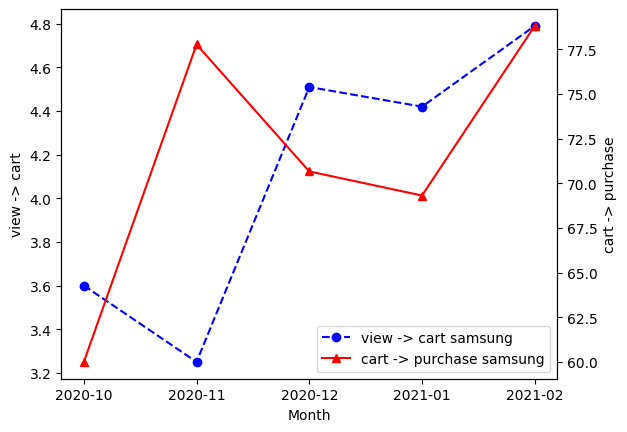

In [146]:
fig, ax1 = plt.subplots()
plt1 = ax1.plot(elec_tele_gp_sam['cart/view'],'bo--', label = 'view -> cart samsung')
# plt12 = ax1.plot(elect_imp_cat_sir['cart/view'],'ro--', label = 'view -> cart sirius')
ax2 = ax1.twinx()
plt2 = ax2.plot(elec_tele_gp_sam['purchase/cart'],'r^-', label = 'cart -> purchase samsung')
# plt22 = ax2.plot(elect_imp_cat_sir['purchase/cart'],'r^-', label = 'cart -> purchase sirius')
ax1.set_xlabel('Month')
ax1.set_ylabel('view -> cart')
ax2.set_ylabel('cart -> purchase')
plts = plt1 + plt2 
# + plt12 + plt22
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'lower right')

In [140]:
elec_tele_gp_sam['ratio'] = elec_tele_gp_sam['cart/view'] * elec_tele_gp_sam['purchase/cart'] / 100

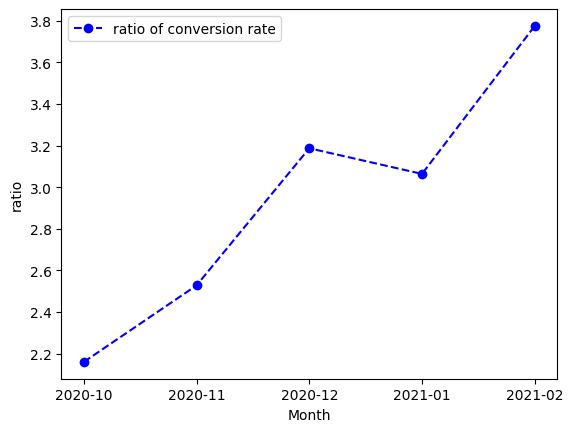

In [141]:
plt.plot(elec_tele_gp_sam['ratio'],'bo--', label = 'ratio of conversion rate')
plt.xlabel('Month')
plt.ylabel('ratio')
plt.legend()

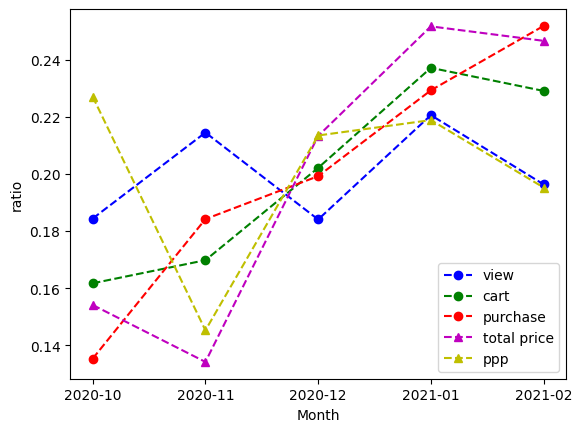

In [147]:
fig, ax1 = plt.subplots()
plt20 = ax1.plot(elec_tele_gp_sam['view'] / elec_tele_gp_sam['view'].sum(),'bo--', label = 'view')
plt21 = ax1.plot(elec_tele_gp_sam['cart'] / elec_tele_gp_sam['cart'].sum(),'go--', label = 'cart')
plt22 = ax1.plot(elec_tele_gp_sam['purchase'] / elec_tele_gp_sam['purchase'].sum(),'ro--', label = 'purchase')
plt23 = ax1.plot(elec_tele_gp_sam['tot_price'] / elec_tele_gp_sam['tot_price'].sum(),'m^--', label = 'total price')
plt24 = ax1.plot(elec_tele_gp_sam['price_per_purchase'] / elec_tele_gp_sam['price_per_purchase'].sum(),'y^--', label = 'ppp')
ax1.set_xlabel('Month')
# ax1.set_ylabel('cart/view')
ax1.set_ylabel('ratio')
# plts = plt10 + plt11 + plt12 + plt13 + plt14 
plts =  plt20 + plt21 + plt22 + plt23 + plt24
labels = [l.get_label()  for l in plts]
ax1.legend(plts, labels, loc = 'lower right')